<a href="https://colab.research.google.com/github/9bishal/Learning-Tensorflow/blob/main/Introduction_to_neural_network_classification_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to the neural network classification with  the  Tendorflowo
In this notebook we're going to learn how to erite a neural network for the classification problems

A classification is where you try to classify something as one of the thing or anotherthing

A few types if the Classification

*Binary Classificatioin

*Multiclass Classification

*Multilabel Classificatioin


#Creating Data to view & fit

In [2]:
from sklearn.datasets import make_circles
#make the 100 examples
n_samples=1000
#create circles
x,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)


In [3]:
#Check out the features
x[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
import pandas as pd
circles=pd.DataFrame({"x0":x[:,0],"x1":x[:,1], "label":y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


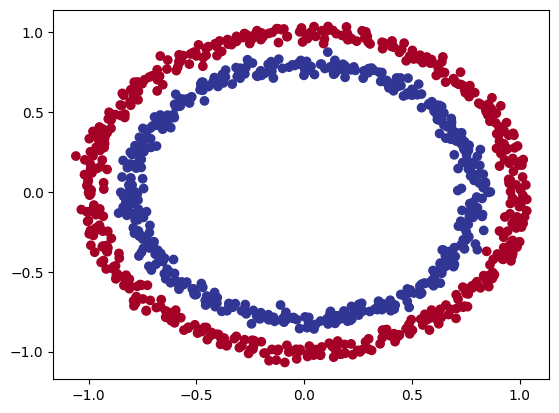

In [6]:
#visualize as a plot
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu)

##Input and Output Shape

In [7]:
#Checking the shpaes of our features and labels
x.shape, y.shape

((1000, 2), (1000,))

In [8]:
#no. of samples
len(x), len(y)

(1000, 1000)

In [9]:
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

##Steps in Modeling

The steps in modeling with tensorflow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweek the model
6. Evaluate

In [10]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [11]:

tf.random.set_seed(42)
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(x,y,epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4477 - loss: 4.6909
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4617 - loss: 3.2099
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4645 - loss: 0.7809
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4627 - loss: 0.7259
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4597 - loss: 0.7084


In [12]:
##Improving the model by training for longer
model_1.fit(x,y,epochs=200, verbose=0)
model_1.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4852 - loss: 0.6927  


[0.6932879686355591, 0.4729999899864197]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy.. it's performing as if it guessing.

So, let's step things up a notch and add an extra layer




In [13]:


tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(x,y,epochs=100, verbose=0)

model_2.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4955 - loss: 8.1322


[8.059046745300293, 0.5]

In [14]:
model_2.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4955 - loss: 8.1322


[8.059046745300293, 0.5]

##Improving our model


Adding the more  layers & increaes the layers of the hidden units

Using the different optimization function such as Adam

We also can fit more epochs for our model


In [15]:

tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(x,y,epochs=100, verbose=0)


In [16]:
model_3.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5116 - loss: 0.6913


[0.6959719061851501, 0.4959999918937683]

#Let's us create another model

In [17]:
tf.random.set_seed(42)
x_regression=tf.range(0,1000, 5)
y_regression=tf.range(100,1100,5)

x_reg_train=x_regression[:150]
x_reg_test=x_regression[150:]


y_reg_train=y_regression[:150]
y_reg_test=y_regression[150:]


# x_regression, y_regression
x_reg_train.shape, x_reg_test.shape


(TensorShape([150]), TensorShape([50]))

In [18]:

tf.random.set_seed(42)
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_4.fit(tf.expand_dims(x_reg_train, axis=1),y_reg_train,epochs=100)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 456.3451 - mae: 456.3451
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 373.5273 - mae: 373.5273 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 288.7426 - mae: 288.7426  
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 200.4564 - mae: 200.4564  
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 106.7298 - mae: 106.7298
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 45.3851 - mae: 45.3851 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 74.0316 - mae: 74.0316 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 67.0194 - mae: 67.0194 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 45.2084 - mae: 45.2084
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 46.6226 - mae: 46.6226  
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 41.1035 - mae: 41.1035 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 42.2963 - mae: 42.2963  
Epoch 13/100

In [19]:
model_4.evaluate(x_reg_test,y_reg_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 60.5821 - mae: 60.5821 


[63.27268600463867, 63.27268981933594]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


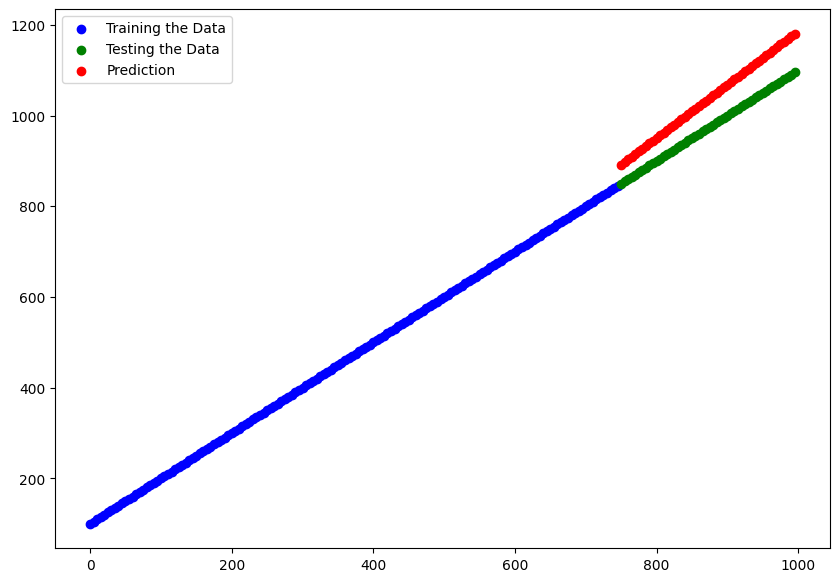

In [20]:
#making the predictioin with our trained model
y_reg_pred=model_4.predict(x_reg_test)
y_reg_pred

#plot the model's prediction against our regression data
plt.figure(figsize=(10,7))
plt.scatter(x_reg_train, y_reg_train, c="b", label="Training the Data")
plt.scatter(x_reg_test, y_reg_test, c="g", label="Testing the Data")
plt.scatter(x_reg_test, y_reg_pred, c="r", label="Prediction")
plt.legend()

#The Missing Piece: Non-linearity part

In [21]:

tf.random.set_seed(42)
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

model_5.fit(x, y,epochs=100)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5102 - loss: 6.0671
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5102 - loss: 6.0576
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5078 - loss: 6.0293
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5105 - loss: 6.0027
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5105 - loss: 5.9912
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5105 - loss: 5.9821
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5105 - loss: 5.9805 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5105 - loss: 5.9780
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5105 - loss: 5.9760
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5105 - loss: 5.9743
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5105 - loss: 5.9728
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

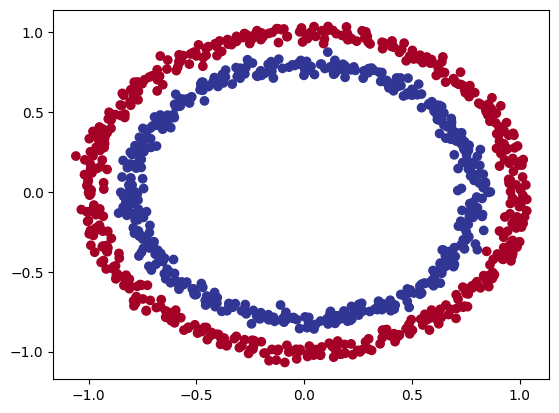

In [22]:
#checking our data
plt.scatter(x[:,0],x[:,1], c=y, cmap=plt.cm.RdYlBu)

In [23]:
# #checking the decision boundary
# plot_decision_boundary(model=model_5,
#                        x=x,
#                        y=y)

#Building the first neural network with the non-linear activation function

In [24]:
tf.random.set_seed(42)
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu"),

])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

model_6.fit(x,y,epochs=100, verbose=1)



Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4705 - loss: 4.6910
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4682 - loss: 4.5863
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4662 - loss: 4.5466
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4651 - loss: 4.5334
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4646 - loss: 4.5154
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4651 - loss: 4.5099
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4625 - loss: 4.5043
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4630 - loss: 4.4993
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4632 - loss: 4.4947
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4638 - loss: 4.4904
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4632 - loss: 4.4863
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [25]:
model_6.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4791 - loss: 0.7714


[0.7562889456748962, 0.4950000047683716]

In [26]:
#time to replicate the multi layer neural network from the tensorflow playground

tf.random.set_seed(42)
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])


history = model_7.fit(x, y, epochs=250, verbose=1)

# x.shape, y.shape

Epoch 1/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5173 - loss: 0.7009
Epoch 2/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5085 - loss: 0.6995
Epoch 3/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4988 - loss: 0.6986
Epoch 4/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4953 - loss: 0.6979
Epoch 5/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4705 - loss: 0.6974
Epoch 6/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4653 - loss: 0.6970
Epoch 7/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4462 - loss: 0.6966
Epoch 8/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4328 - loss: 0.6963
Epoch 9/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4268 - loss: 0.6960
Epoch 10/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4191 - loss: 0.6958
Epoch 11/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3697 - loss: 0.6955
Epoch 12/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

In [27]:
model_7.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9762 - loss: 0.1192


[0.11715656518936157, 0.9779999852180481]

In [28]:
#how do our model's prediction loooks like
# plot_decision_boundary(model_7, x,y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


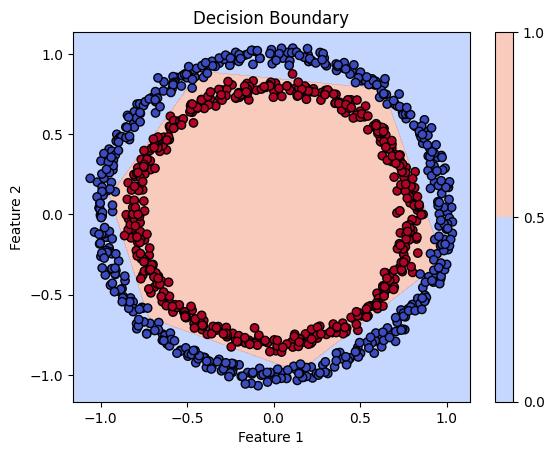

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary of a trained model.

    Parameters:
    - model: Trained TensorFlow model
    - X: Input features (2D)
    - y: Target labels (binary classification)
    """
    # Define min and max values for the plot
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    # Create a grid of points with a small step size
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Stack and reshape into (N, 2) for model predictions
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Predict probabilities for each grid point
    preds = model.predict(grid_points)
    preds = preds.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], alpha=0.5, cmap="coolwarm")
    plt.colorbar()

    # Plot actual data points
    plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), cmap="coolwarm", edgecolors="k")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

# Call the function
plot_decision_boundary(model_7, x, y)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


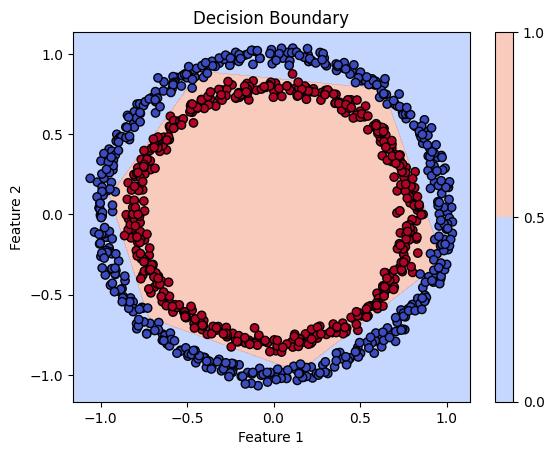

In [30]:
plot_decision_boundary(model_7, x, y)

In [31]:
#Create a toy tensor(similar to the data we pass into our model)
A=tf.cast(tf.range(-10, 10), dtype=tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

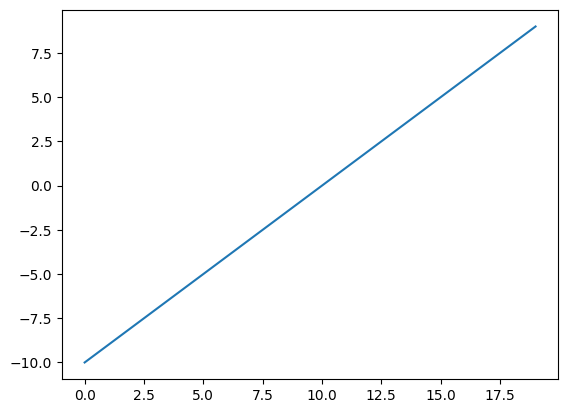

In [32]:
#vislauising our toy tensor
plt.plot(A)

In [33]:
#Let's start by replicating sigmoid -sigmoid(x)=1/(1+exp(-x))
def sigmoid(x):
  return 1/(1+tf.exp(-x))

In [34]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

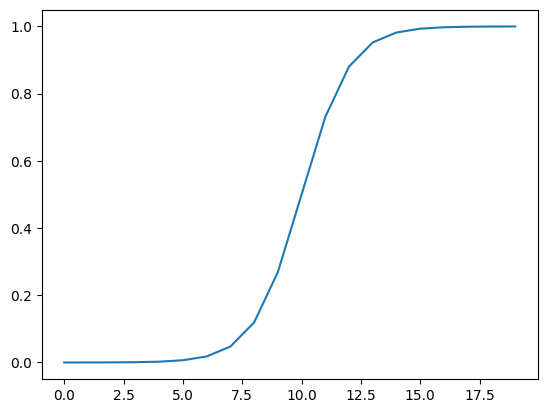

In [35]:
plt.plot(sigmoid(A))

In [36]:
#let's create the relu function
def relu(x):
  return tf.maximum(0,x)

In [37]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [38]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

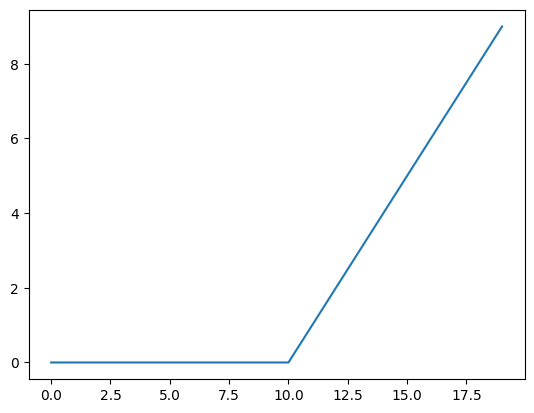

In [39]:
plt.plot(relu(A))

In [40]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [41]:
#let's try the linear activation functioin
# def linear(x):


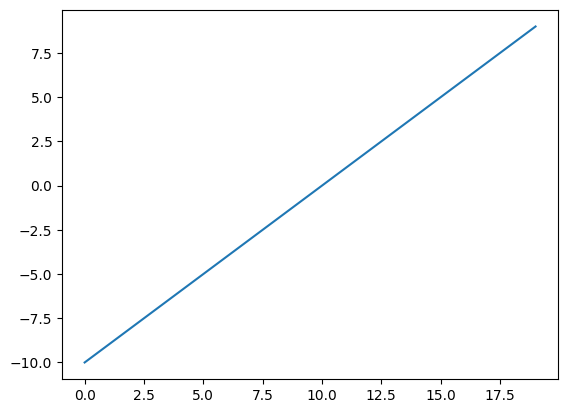

In [42]:
plt.plot(tf.keras.activations.linear(A))

In [43]:
#does A== tf.keras.activation.linear(A)
A== tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

#Evaluating and Improving our Classification

In [44]:
x.shape,y.shape

((1000, 2), (1000,))

In [45]:
x_train, y_train=x[:800], y[:800]
x_test, y_test=x[800:], y[800:]

x_train.shape, x_test.shape,y_train.shape,  y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [46]:
#Creating the model to fit and to evaluate on the training and testing the data
#time to replicate the multi layer neural network from the tensorflow playground

tf.random.set_seed(42)
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])


history = model_8.fit(x_train, y_train, epochs=25, verbose=1)


Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5136 - loss: 0.6921
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5837 - loss: 0.6840 
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6537 - loss: 0.6683 
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7876 - loss: 0.6414 
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8418 - loss: 0.6022 
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8628 - loss: 0.5487
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8962 - loss: 0.4861
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9316 - loss: 0.4177 
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9570 - loss: 0.3411
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9738 - loss: 0.2796
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9798 - loss: 0.2315 
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.977

In [47]:
model_8.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9981 - loss: 0.0428  


[0.046179670840501785, 0.9950000047683716]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


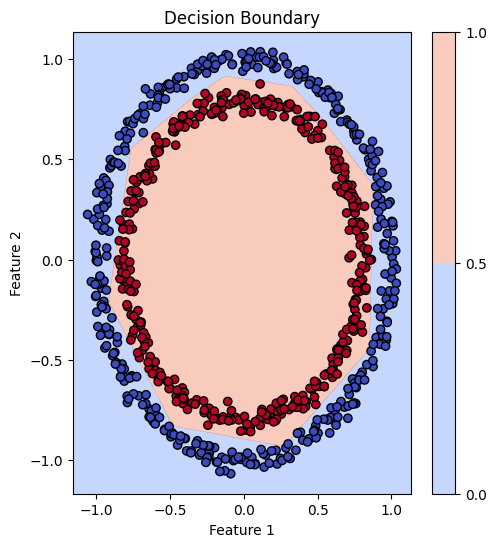

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


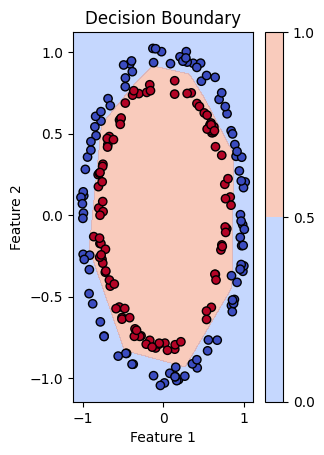

In [48]:
#ploting the decision boundaries for the training and test set
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, x_train,y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, x_test,y_test)
plt.show();

##Plot thr loss (or training) curves

In [49]:
history.history

{'accuracy': [0.5137500166893005,
  0.5712500214576721,
  0.6812499761581421,
  0.8100000023841858,
  0.8712499737739563,
  0.8837500214576721,
  0.9125000238418579,
  0.9462500214576721,
  0.9637500047683716,
  0.9737499952316284,
  0.9787499904632568,
  0.9800000190734863,
  0.981249988079071,
  0.987500011920929,
  0.9912499785423279,
  0.9937499761581421,
  0.9925000071525574,
  0.9937499761581421,
  0.9937499761581421,
  0.9925000071525574,
  0.9900000095367432,
  0.9925000071525574,
  0.9925000071525574,
  0.9950000047683716,
  0.9962499737739563],
 'loss': [0.6913384795188904,
  0.6829929947853088,
  0.6643324494361877,
  0.6331475377082825,
  0.5882388949394226,
  0.5313518047332764,
  0.46748363971710205,
  0.3968014419078827,
  0.32491177320480347,
  0.26700323820114136,
  0.22130849957466125,
  0.1872183084487915,
  0.15986110270023346,
  0.1391216516494751,
  0.12175417691469193,
  0.10784640163183212,
  0.09573694318532944,
  0.08545077592134476,
  0.07750673592090607,
  0

###Coverting the history object into a DataFrame

In [50]:
pd.DataFrame(history.history)

,accuracy,loss
0,0.51375,0.691338
1,0.57125,0.682993
2,0.68125,0.664332
3,0.81000,0.633148
4,0.87125,0.588239
5,0.88375,0.531352
6,0.91250,0.467484
7,0.94625,0.396801
8,0.96375,0.324912
9,0.97375,0.267003


###Ploting the loss curves

Text(0.5, 1.0, 'Model_8 Loss Curves ')

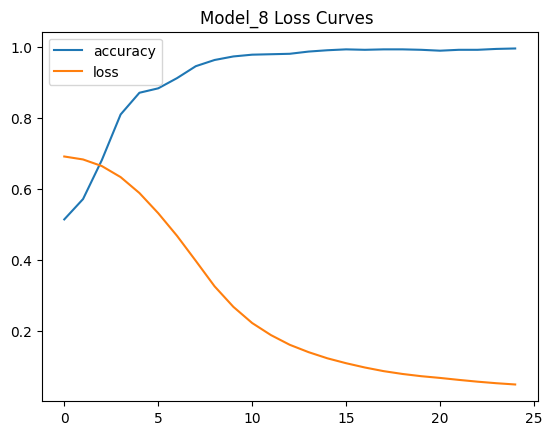

In [51]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 Loss Curves ")

##Finding the best learning rate

To find the best learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:

*A learning rate **call back** - you can think of a call back as an extra piece of functionality, you can add to your *while* it's training.

*Another model (we could use the same one as above, but we're practicing building model)

*A modified loss curves plot

In [52]:
#Creating the model to fit and to evaluate on the training and testing the data
tf.random.set_seed(42)
model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])


#Create a learning rate call back
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))


history_9 = model_9.fit(x_train, y_train, epochs=100, callbacks=[lr_scheduler])


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5203 - loss: 0.7016 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5151 - loss: 0.7011 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5124 - loss: 0.7005 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5161 - loss: 0.7000 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5161 - loss: 0.6994 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5155 - loss: 0.6988 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5137 - loss: 0.6981 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5127 - loss: 0.6975 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5142 - loss: 0.6969 - learning_

In [53]:
pd.DataFrame(history_9.history)

,accuracy,loss,learning_rate
0,0.50250,0.706861,0.000100
1,0.49875,0.706273,0.000112
2,0.49750,0.705655,0.000126
3,0.50000,0.705004,0.000141
4,0.50000,0.704322,0.000158
...,...,...,...
95,0.48875,0.798645,5.623413
96,0.48375,0.845436,6.309574
97,0.48625,0.893010,7.079458
98,0.48625,0.941567,7.943282


<Axes: xlabel='epochs'>

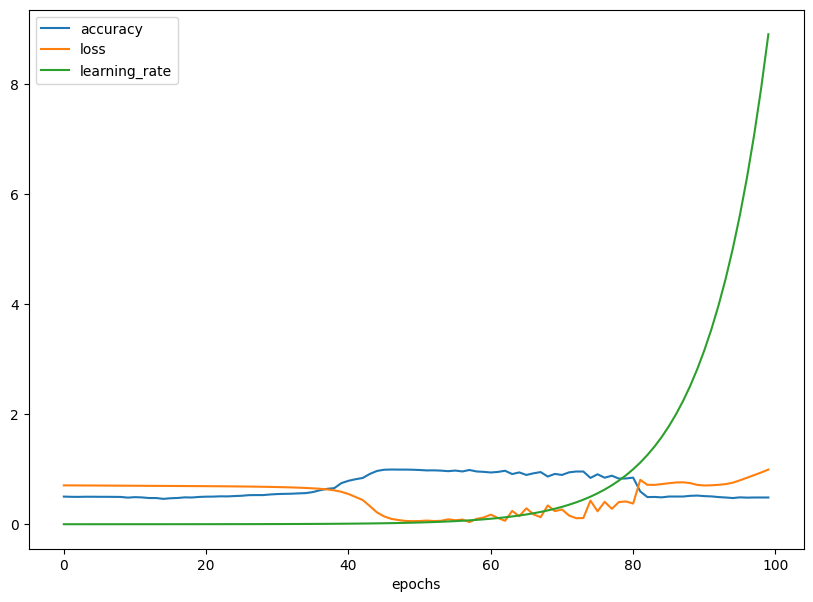

In [54]:
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs")

###Ploting the learning rate versus the loss


Text(0.5, 1.0, 'Learning Rate vs Loss')

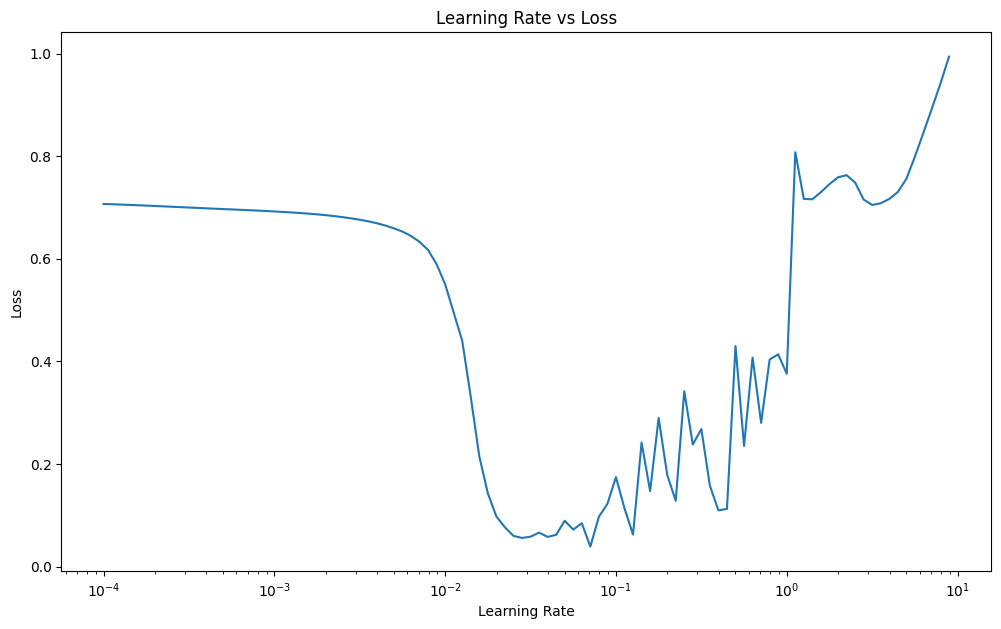

In [55]:
lrs=1e-4*(10**(tf.range(100)/20))
plt.figure(figsize=(12,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

In [59]:
#let's try using the higher *ideal* learning rate with the same model before
#Creating the model to fit and to evaluate on the training and testing the data
tf.random.set_seed(42)
model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])


#Create a learning rate call back
# lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))


history_10 = model_10.fit(x_train, y_train, epochs=20)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5380 - loss: 0.6842
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5864 - loss: 0.6698 
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6563 - loss: 0.6414 
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7129 - loss: 0.5924
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7816 - loss: 0.5190
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7958 - loss: 0.4616 
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8616 - loss: 0.3810
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9612 - loss: 0.2615
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9767 - loss: 0.1919 
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9730 - loss: 0.1459 
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9741 - loss: 0.1206
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9771

In [60]:
model_10.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9935 - loss: 0.0460 


[0.06356251984834671, 0.9850000143051147]

In [61]:
model_8.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9981 - loss: 0.0428


[0.046179670840501785, 0.9950000047683716]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


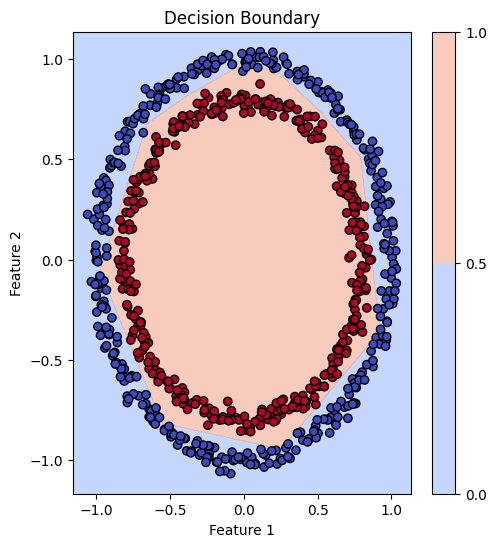

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


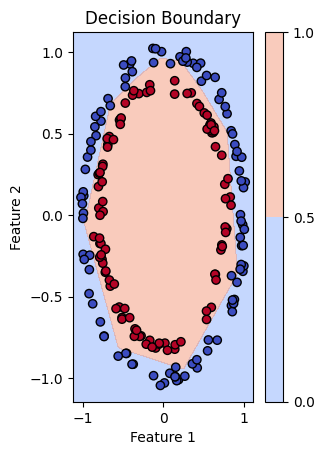

In [64]:
#plot the decision boundary for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model_10, x_train, y_train)


plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, x_test, y_test)
plt.show()


#Introducing more classification evaluation methods

Alongside visualising our model results as much as possible, there are a handful of other classification evaluation methods that you should be familar with:

*Accuracy

*Precision

*Recall

*F1-score

*Confusion

*Classification report( from sklict lear)


In [68]:
#checking the accuaracy of our model
loss, accuracy =model_10.evaluate(x_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model Accuracy on the test set: {(accuracy*100):.2f}%")
# loss, accuracy

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9935 - loss: 0.0460
Model loss on the test set: 0.06356251984834671
Model Accuracy on the test set: 98.50%


###How about the Confusion matries?

In [84]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

#making the prediction
y_preds=model_10.predict(x_test)

#create confusion matrix
# confusion_matrix(y_test, y_preds)

##ValueError: Classification metrics can't handle a mix of binary and continuous targets

#-> we need to convert into the binary form

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [77]:
#Converting prediction probabilities to the Binary Format and view the first 10
y_preds_1=tf.round(y_preds)[:10]
y_preds_1

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [83]:
#creating the confusion matrix
confusion_matrix(y_test,tf.round(y_preds))

array([[98,  3],
       [ 0, 99]])

#How about we preetify our confusion matrix


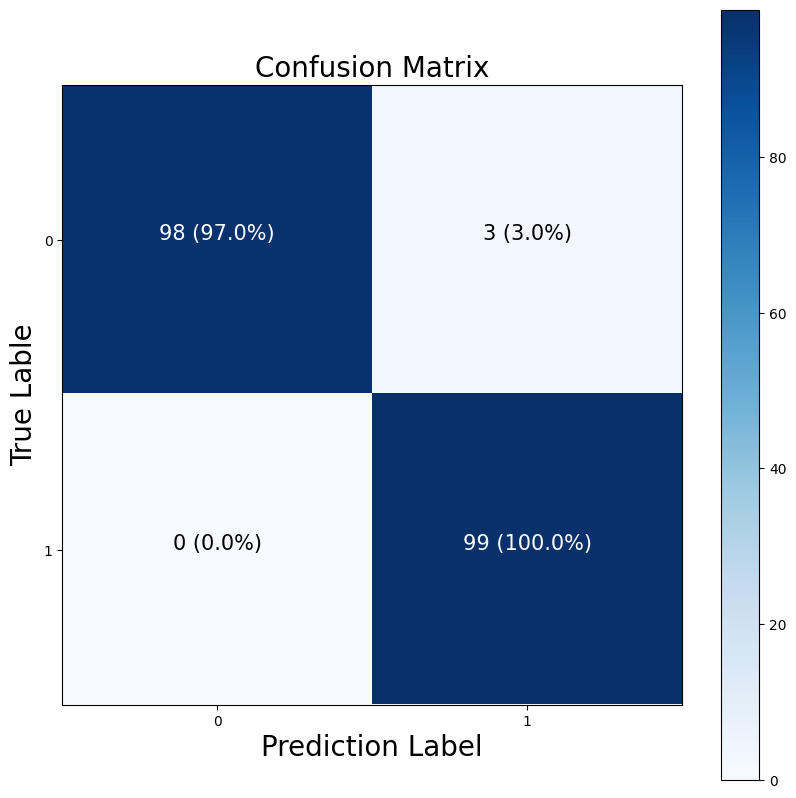

In [95]:
import itertools
figsize=(10,10)
#creating the confusion matrix
cm=confusion_matrix(y_test, tf.round(y_preds))
cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] #normalize our confusion
n_class=cm.shape[0]

#let's preetify it
fig, ax=plt.subplots(figsize=figsize)

#create a matrix plot
cax=ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

#craete a classes
classes=False

if classes:
  labels=classes
else:
  labels=np.arange(cm.shape[0])

#label the axis
ax.set(title="Confusion Matrix",
       xlabel="Prediction Label",
       ylabel="True Lable",
       xticks=np.arange(n_class),
       yticks=np.arange(n_class),
       xticklabels=labels,
       yticklabels=labels)


ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

#set the threshold for thr different colors
threshold=(cm.max()+cm.min())/2

#plot the test on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j]>threshold else "black",
           size=15)



#Working wiht the larger example(multi class example)

when we have more than two classes as an option, it's known as **multi-class classification**

*This means if you have 3 different classes, it's multi class classificatin

*it also means if you have 100 different classes, it's multi class- classification

To practice the multi class classification, we're going to build a neural network to classify images of diffreent items of clothing.




In [132]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#the data has already been sorted into training and tests set for us
(train_data, train_labels),(test_data, test_labels) =fashion_mnist.load_data()

In [136]:
#show the first training example

# train_data,train_labels
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training labels:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [104]:
#check the shape of a single label
train_data[0].shape, train_labels[0].shape


((28, 28), ())

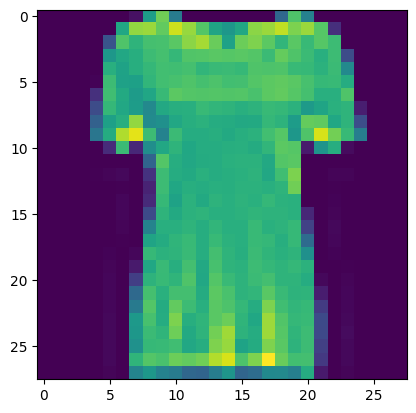

In [111]:
#plot the single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[10]);

In [130]:
#chech the sampl label
train_labels[7]

2